# Inteligencia Artifical 

## Regresion Linear y Minimos Cuadrados Ordinarios

In [147]:
#Librerias utiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston # Esta libreria tiene sus csv para probar

In [148]:
boston = load_boston()

In [149]:
print(boston.DESCR) # Permite ver la descripcion del data set

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [150]:
df = pd.DataFrame(boston.data)

In [151]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [152]:
columns= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [153]:
df = pd.DataFrame(boston.data, columns= columns)

In [154]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [155]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [156]:
df.shape

(506, 13)

In [157]:
# salida_Y = w0 + w1 * entrada_X modelo de regresion linear simple

entrada_X = np.array(df['RM'])
entrada_X

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [158]:
Y = pd.DataFrame(boston.target, columns=['MEDV'])

In [159]:
salida_Y= np.array(Y['MEDV'])

In [160]:
# Añadimos columnas de 1 para termino independiente w0
X = np.array([np.ones(506),df['RM']]).T
#Ahora entrada x tiene dos columnas


##### La formula del minimo error cuadratico medio(MCU): $b=(X^TX)^{-1}X^TY$

In [161]:
b = np.linalg.inv(X.T @ X)@ X.T @ salida_Y
b# Contiene [w0, w1] de la formula  Y = w0 + w1 * X 

array([-34.67062078,   9.10210898])

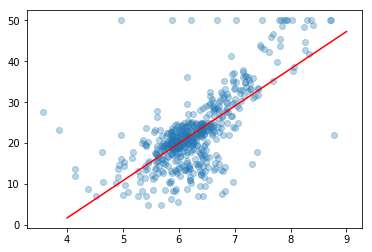

In [162]:
plt.scatter(entrada_X, salida_Y, alpha=0.3)
plt.plot([4,9], [b[0]+b[1]*4, b[0]+b[1]*9], c="red")
plt.show()

## Regresion lineal Simple usando librerias 

In [163]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [164]:
modelo  = linear_model.LinearRegression()
X  =  pd.DataFrame(df['RM'], columns=['RM'])
X2 =  pd.DataFrame(df['AGE'], columns=['AGE'])
X3 =  pd.DataFrame(df['DIS'], columns=['DIS'])
Y  =  pd.DataFrame(boston.target, columns=['MEDV'])

In [165]:
modelo.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
y_pred = modelo.predict(X) # desde el modelo predecimos los valores y

In [167]:
y_pred

array([[25.17574577],
       [23.77402099],
       [30.72803225],
       [29.02593787],
       [30.38215211],
       [23.85593997],
       [20.05125842],
       [21.50759586],
       [16.5833549 ],
       [19.97844155],
       [23.3735282 ],
       [20.02395209],
       [18.93169901],
       [19.47782555],
       [20.81583557],
       [18.43108302],
       [19.35039603],
       [19.85101202],
       [14.99048582],
       [17.45715736],
       [16.02812625],
       [19.6234593 ],
       [21.23453259],
       [18.23993873],
       [19.25027283],
       [16.29208741],
       [18.23993873],
       [20.36983223],
       [24.44757706],
       [26.07685456],
       [17.32972783],
       [20.59738496],
       [19.48692766],
       [17.22050253],
       [20.81583557],
       [19.33219181],
       [18.49479778],
       [18.57671676],
       [19.63256141],
       [25.35778795],
       [29.26259271],
       [26.95065703],
       [21.48028953],
       [21.86257811],
       [20.57007863],
       [17

In [168]:
print('Error cuadrático medio: %.2f' % mean_squared_error(Y, y_pred))
print('Estadístico R_2: %.2f' % r2_score(Y, y_pred))

print('Coeficiente Intercepcion beta 0 (w0)', modelo.intercept_[0])
print('Coeficiente  beta 1 (w1)', modelo.coef_[0])
w1 = modelo.coef_[0]
w0 = modelo.intercept_[0]
x_inicio = 4
x_final=9

Error cuadrático medio: 43.60
Estadístico R_2: 0.48
Coeficiente Intercepcion beta 0 (w0) -34.67062077643857
Coeficiente  beta 1 (w1) [9.10210898]


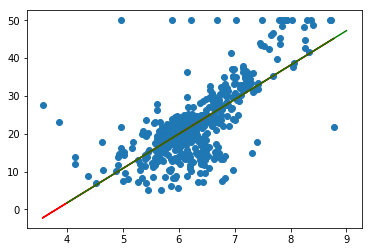

In [169]:
plt.scatter(X, Y)

#plt.scatter(X, y_pred, color='red')
plt.plot(X, y_pred, color='red')
x_real = np.array([x_inicio, x_final])
y_real =  np.array([w0+w1*x_inicio, w0+w1*x_final])
plt.plot(x_real, y_real, color='green')
plt.show()
# Se syperponen las linea real del modelo calculado anterior mente sin librerias y la predicha por el modelo usando las librerias

# Regresion Lineal Multiple 

En la práctica solemos tener n variables predictoras, no sólo 1. Podríamos hacer n regresiones lineales simples, pero cada una de ellas ignoraría a las otras $n-1$ variables y no se sacaría ventaja de las relaciones entre variables. $Y = W0+ W1*X1 + W2*X2 ... +Wn*Xn$

In [170]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

In [171]:
X_MULTIPLE =  df[['RM', 'AGE', 'DIS']]
X_MULTIPLE.shape

(506, 3)

In [172]:
Y =  pd.DataFrame(boston.target, columns=['MEDV'])

In [173]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_MULTIPLE, Y, test_size=0.2)

In [174]:
X_train.head()

,RM,AGE,DIS
52,6.511,21.1,6.8147
418,5.957,100.0,1.8026
211,5.404,88.6,3.6650
471,6.229,90.7,3.0993
30,5.713,94.1,4.2330


In [175]:
#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

In [176]:
lr_multiple.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [177]:
#Realizo una predicción
Y_pred_multiple = lr_multiple.predict(X_test)
Y_pred_multiple_trainig = lr_multiple.predict(X_train)

### DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

#### Valor de las pendientes o coeficientes w1 w2 w3:

In [178]:
lr_multiple.coef_

array([[ 8.94714765, -0.08981632, -0.31194833]])

In [179]:

w1_multiple =  lr_multiple.coef_[0][0]
w2_multiple =  lr_multiple.coef_[0][1]
w3_multiple =  lr_multiple.coef_[0][2]

#### Valor de la intersección o coeficiente w0:

In [180]:
lr_multiple.intercept_

array([-26.4370471])

In [181]:
lr_multiple.intercept_
w0_multiple= lr_multiple.intercept_[0]

### Precisión del modelo:

In [182]:
lr_multiple.score(X_train, y_train)

0.5556793548271759

# Grafica de regresion multiple:

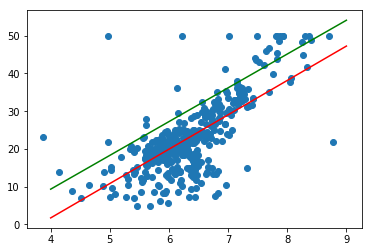

In [185]:
plt.scatter(X_train['RM'], y_train)# Entrenamiento con el 80% de los datos
#plt.scatter(X_train['AGE'], y_train, color= "yellow")
#plt.scatter(X_train['DIS'], y_train, color= "yellow")
#plt.scatter(X, y_pred, color='red')
x_real_multiple = np.array([4, 9])
y_real_multiple =  np.array([w0_multiple+w1_multiple*4, w0_multiple+w1_multiple*9])
plt.plot(x_real_multiple, y_real_multiple, color='green')

x_real = np.array([4, 9])
y_real =  np.array([w0+w1*4, w0+w1*9])
plt.plot(x_real, y_real, color='red')

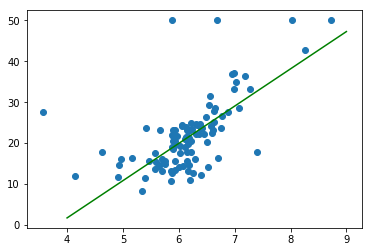

In [184]:
plt.scatter(X_test['RM'], y_test)# Testing con el 20% de los datos
x_real = np.array([4, 9])
y_real =  np.array([w0+w1*4, w0+w1*9])
plt.plot(x_real, y_real, color='green')

In [ ]:
Nota: Veo que la regresion multiple afecta la relacion directa de la regresion lineal simple haciendo un peor modelo individual.